# Interactive 1: Dataset preparation
In this notebook, we prepare a dataset with H₂O vs CO₂ contents of multiple samples from one dataset and save this to pickle files for fast access. We here use the dataset of melt inclusions from Cerro Negro volcano in Nicaragua from @roggensack2001. This will be used to create an interactive version of the plot shown below, this is modeled after Figure 11 in VESIcal @iacovino2021.

![Figure 11](Figure11.png)

In [6]:
import VESIcal as v
import pickle
import warnings
warnings.filterwarnings('ignore')

In [7]:
myfile = v.BatchFile('cerro_negro.xlsx')

## Calculate the isobars and pickle

**Uncomment the below to redo the calculation, else use the pickle file loaded in next cell**

In [ ]:
# Calculate isobars for all samples at 500, 1000, 2000, 3000, and 4000 bars (this will take  while to run...)
isobar_list = []
isopleth_list = []
for index, row in myfile.get_data().iterrows():
    print(row.name)
    isobars, isopleths = v.calculate_isobars_and_isopleths(sample=myfile.get_sample_composition(samplename=row.name, asSampleClass=True),
                                                         temperature=1200,
                                                         pressure_list=[500, 1000, 2000, 3000, 4000],
                                                         print_status=True).result
    isobar_list.append(isobars)
    isopleth_list.append(isopleths) # save this in case  we decide to use it later, since it's calculated anyways


with open('Interaction1_isobars.pickle', 'wb') as handle:
    pickle.dump(isobar_list, handle)

with open('Interaction1_isopleths.pickle', 'wb') as handle:
    pickle.dump(isopleth_list, handle)

In [9]:
# load data from pickled file

file = open('Interaction1_isobars.pickle', 'rb')
isobar_list = pickle.load(file)

In [5]:
# add sample names for easier referencing
sample_names = [row.name for index, row in myfile.get_data().iterrows()]

isobar_dict = {}
for count, value in enumerate(isobar_list):
    isobar_dict[sample_names[count]] = value

## Plot the dataset for verification

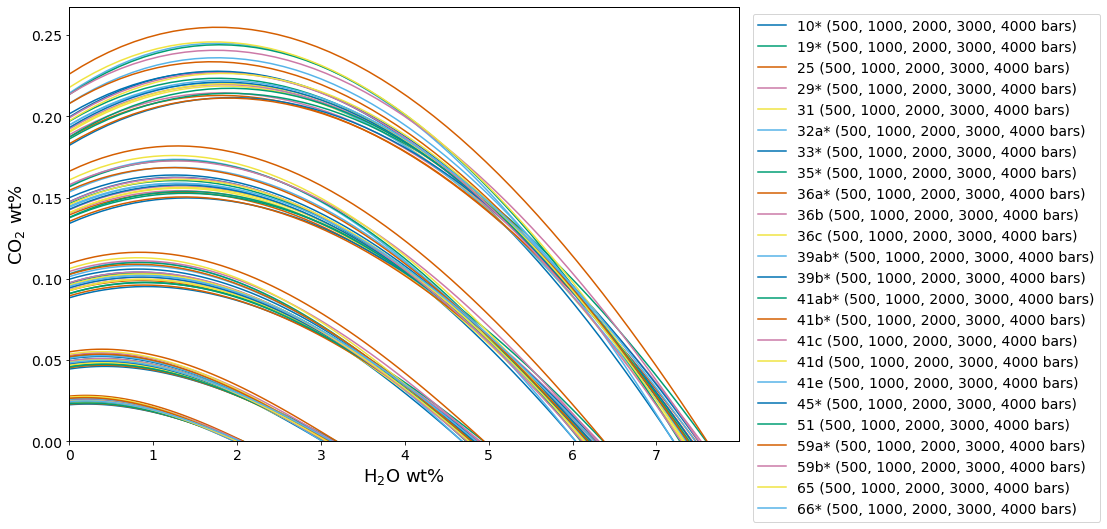

In [7]:
#Plot all isobars from dataset
fig, ax = v.plot(isobars=[isobar for isobar in isobar_dict.values()], isobar_labels=sample_names)
v.show()